<h1 align=center><font size = 5>Waffle Charts, and Word Clouds</font></h1>

## Introduction

In this lab, we will learn how to create word clouds and waffle charts. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *p*andas](#0)<br>
2. [Downloading and Prepping Data](#2)<br>
3. [Visualizing Data using Matplotlib](#4) <br>
4. [Waffle Charts](#6) <br>
5. [Word Clouds](#8) <br>
7. [Regression Plots](#10) <br> 
</div>
<hr>

# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.

# Downloading and Prepping Data <a id="2"></a>

Import Primary Modules:

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

Let's download and import our primary Canadian Immigration dataset using *pandas* `read_excel()` method. Before we can do that, we would need to download a module which *pandas* requires to read in excel files. This module is **xlrd**.

In [2]:
!pip install xlrd
print('xlrd Installed!')

xlrd Installed!


Download the dataset and read it into a *pandas* dataframe:

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's find out how many entries there are in our dataset

In [5]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to first notebook for a detailed description of this preprocessing.

In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(df_can.columns.map(str))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


# Visualizing Data using Matplotlib<a id="4"></a>

Import `matplotlib`:

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


# Waffle Charts <a id="6"></a>


A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. Where each cell in the Waffle Chart constitutes of 10 X 10 cell grid in which each cell represents one percentage point summing up to total 100%. It is commonly an effective option when you are trying to add interesting visualization features to a visual.

`waffle` charts are built into pywaffle - python visualization library. TWe will learn how to create waffle charts using pywaffle library.

First, let's install the package.

In [8]:
!pip install pywaffle
print("\npywaffle installed!")

pywaffle installed!



In [9]:
from pywaffle import Waffle

Let's revisit the previous case study about Denmark, Norway, and Sweden.

In [10]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [11]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [value / total_values for value in df_dsn['Total']]
print(category_proportions)

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [12]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [13]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
print(tiles_per_category)

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

[129, 77, 194]
Denmark: 129
Norway: 77
Sweden: 194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4.** Create the `waffle` chart

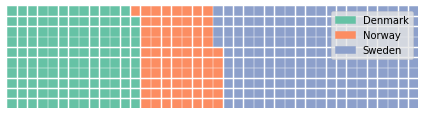

In [14]:
plt.figure( 
    FigureClass = Waffle, 
    rows = 10, 
    values = tiles_per_category, 
    labels = list(df_dsn.index) 
) 
plt.show()

**Step 5.** Prettify the chart.

starting_location: Change the starting location plotting the blocks. ``{'NW', 'SW', 'NE', 'SE'}``

    | When it's 'NW', it means plots start from upper-left; 'SW' means plots start from lower-left; 'NE' means plots start from upper-right; 'SE' means plots start from lower-right.

block_arranging_style: Set how to arrange blocks. ``{'normal', 'snake', 'new-line'}``

    | If it is 'normal', it draws blocks line by line with same direction.
    | If it is 'snake', it draws blocks with snake pattern.
    | If it is 'new-line', it starts with a new line when drawing each category.

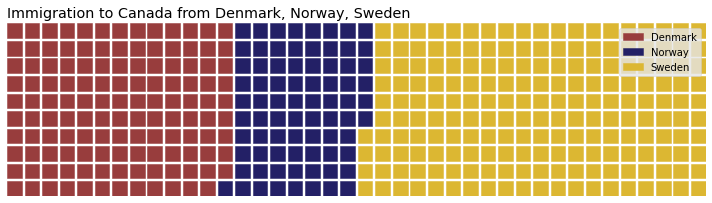

In [15]:
plt.figure(
    FigureClass = Waffle, 
    rows = 10, 
    values = tiles_per_category,
    title={'label': 'Immigration to Canada from Denmark, Norway, Sweden', 'loc': 'left'},
    labels=list(df_dsn.index),
    colors=("#983D3D", "#232066", "#DCB732"),
    starting_location='NW',
    block_arranging_style='snake',
    figsize=(10, 5)
)
plt.show()

And there you go! What a good looking *delicious* `waffle` chart, don't you think?

Now it would very inefficient to repeat these five steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1. **categories**: Unique categories or classes in dataframe.
> 2. **values**: Values corresponding to categories or classes.
> 3. **height**: Defined height of waffle chart.
> 4. **width**: Defined width of waffle chart.

In [16]:
def create_waffle_chart(categories, values, height, width):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    #print waffle chart
    plt.figure(
        FigureClass = Waffle, 
        rows = height,
        values = tiles_per_category,
        title={'label': 'Immigration to Canada from Denmark, Norway, Sweden', 'loc': 'left'},
        labels=list(categories),
        starting_location='NW',
        block_arranging_style='snake',
        figsize=(10, 5)
    )
    
    plt.show()

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:

In [17]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

And now let's call our function to create a `waffle` chart.

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


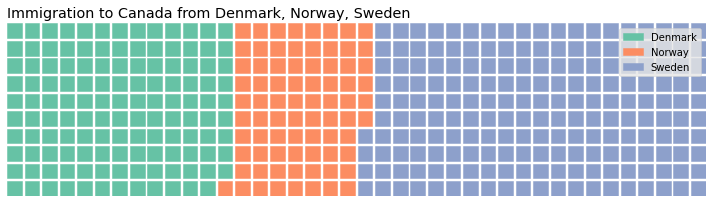

In [18]:
create_waffle_chart(categories, values, height, width)

# Word Clouds <a id="8"></a>


`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://pypi.org/project/wordcloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

First, let's install the package.

In [19]:
# install wordcloud
!pip install wordcloud
print("\nWord cloud installed!")


Word cloud installed!


In [20]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is imported!')

Wordcloud is imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordingly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a _.txt_ file of the novel.

In [21]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


'wget' is not recognized as an internal or external command,
operable program or batch file.


Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [22]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [23]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.

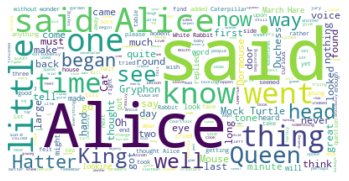

In [24]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little** and so on. Let's resize the cloud so that we can see the less frequent words a little better.

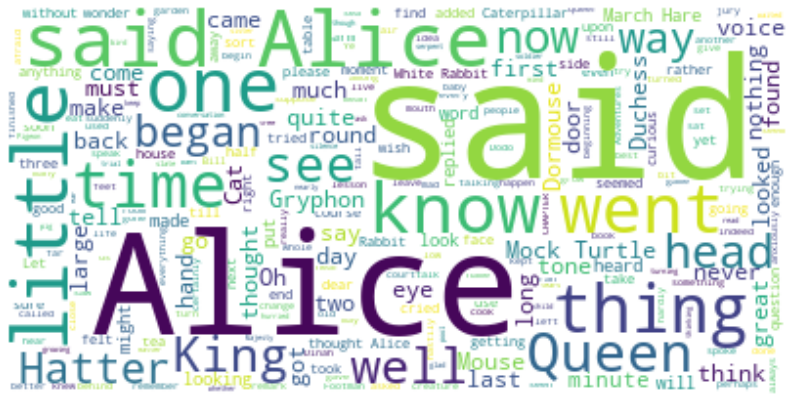

In [25]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

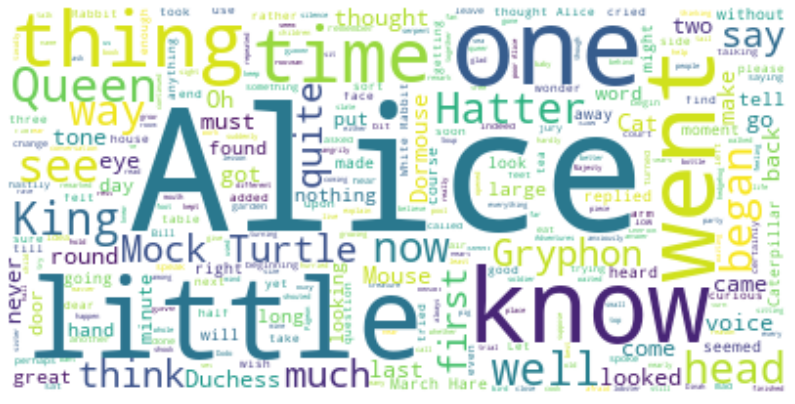

In [26]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it *alice_mask.png*.

In [27]:
# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


'wget' is not recognized as an internal or external command,
operable program or batch file.


Let's take a look at how the mask looks like.

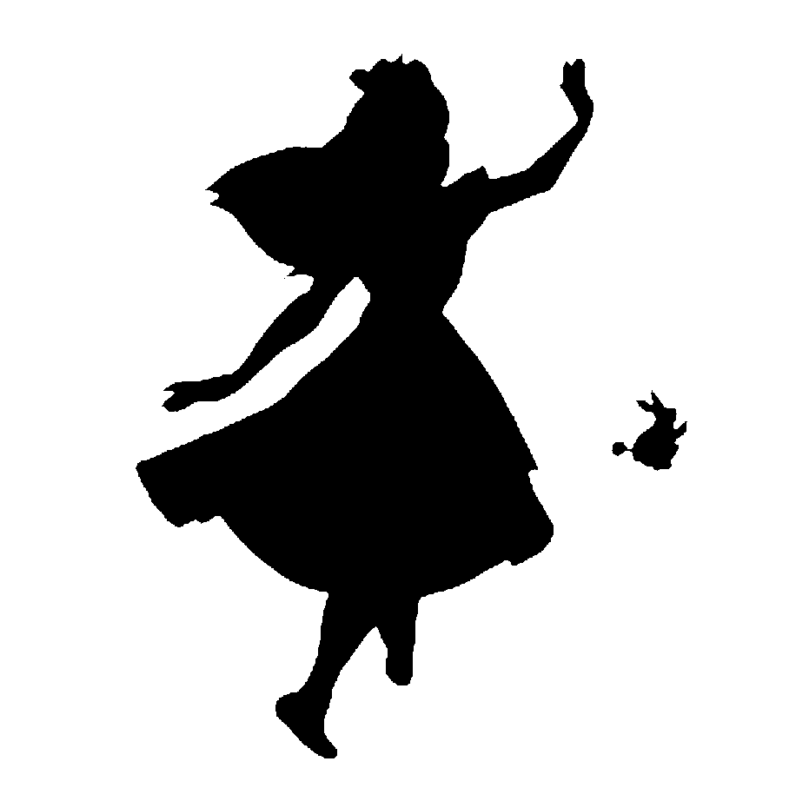

In [28]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

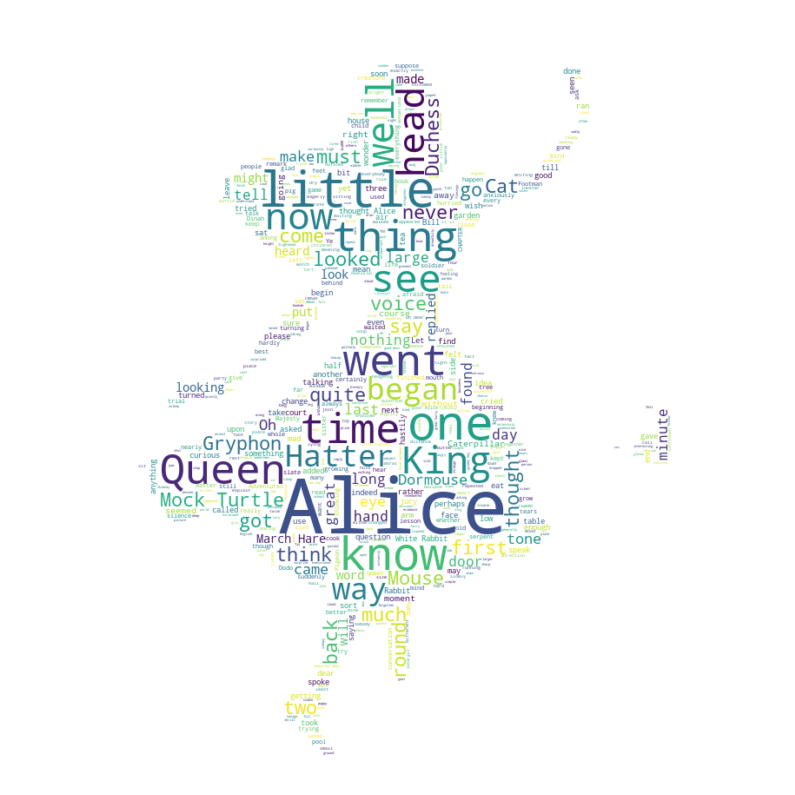

In [29]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Really impressive!

Unfortunately, our immmigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

Let's recall how our data looks like.

In [30]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


And what was the total immigration from 1980 to 2013?

In [31]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [32]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

In [33]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


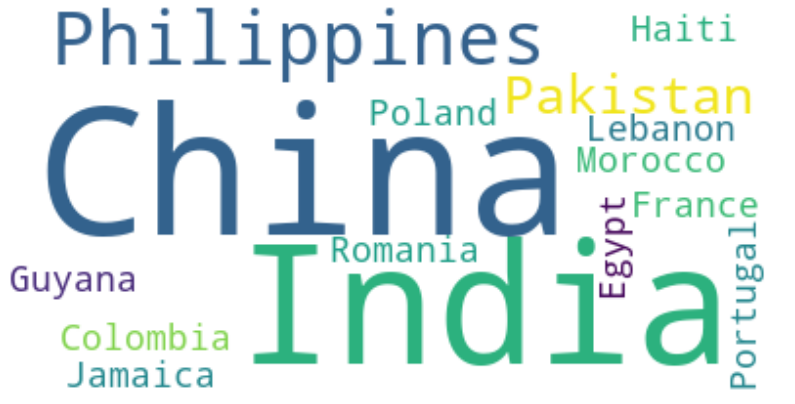

In [34]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!